In [18]:
import scipy.stats as sps
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tqdm.notebook import tqdm as tqdm_notebook

# Why we need statistics

## Toss a coin exmaple

In [19]:
# Fair coin distibution

head_probability = 0.5
fair_coin = sps.bernoulli(p=head_probability)
fair_coin_toss = fair_coin.rvs

In [20]:
# Toss a coin
fair_coin_toss()

1

In [21]:
min_tosses = 50
max_tosses = 10000
step_size = 50

tosses_array = range(min_tosses, max_tosses, step_size)
tosses_result = []

for i in tqdm_notebook(tosses_array):
    heads_part = np.mean(fair_coin_toss(i))
    tosses_result.append(heads_part)



  0%|          | 0/199 [00:00<?, ?it/s]

**Tosses vizualization**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


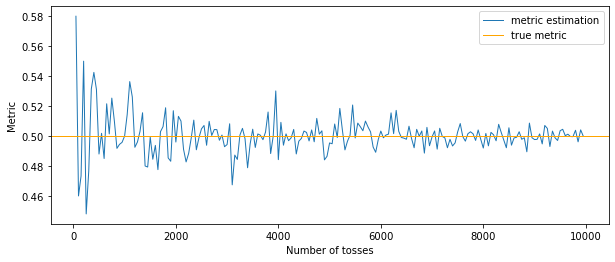

In [22]:
plt.figure(figsize=(10, 4))
plt.legend(fontsize=15)



figure = sns.lineplot(x=tosses_array,
                      y=tosses_result, 
                      palette="tab10", 
                      linewidth=1, 
                      label="metric estimation")

plt.axhline(head_probability,
            color='orange',
            linewidth=1,
            label='true metric')

plt.xlabel('Number of tosses')
plt.ylabel('Metric')

plt.legend()
plt.show()

- Each experiment gives us an estimation of real metric
- Number of tosses in sample is our information that we use for estimation
- The bigger sample we have (number of tosses) the more accurate is our estimation
- But it's always some noise that prevent us to get true metric

## H0 Distribution of estimations

As we see our estimation accuracy strongly depends on the sample size (information we have)

Let's get an approximate distribution of possible metric values for the given sample size

### Monte-Carlo method

In [23]:
sample_size = 1000
mc_iters = int(1e4) #10k iterations

true_p = 0.5

samples = sps.binom(p=true_p, n=sample_size).rvs(mc_iters)
samples_metrics = samples / sample_size

df = pd.DataFrame(samples_metrics, columns=["samples_metrics"])

**When we ran 10k iterations, our estimations follow this distribtion:**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


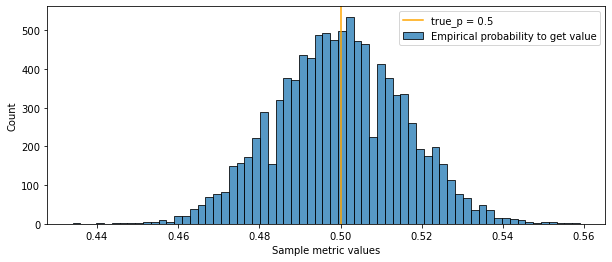

In [24]:
plt.figure(figsize=(10, 4))
plt.legend(fontsize=15)

sns.histplot(df,
             x="samples_metrics",
             palette="tab10",
             label= 'Empirical probability to get value')

plt.axvline(x=true_p, 
            c='orange',
            label=f"true_p = {round(true_p,1)}")
plt.xlabel('Sample metric values')

plt.legend()
plt.show()


So, we can see that some values occures more frequently than others. 

In [25]:
alpha = 0.1

left_bound =  np.quantile(samples_metrics, alpha/2)
right_bound = np.quantile(samples_metrics, 1-alpha/2)
df_with_ci = df.assign(ci=lambda x: (x<= left_bound) | (x >= right_bound))

**We can place a threshold that says: these value occures in only X% of all cases --> there is small possibility to get them**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


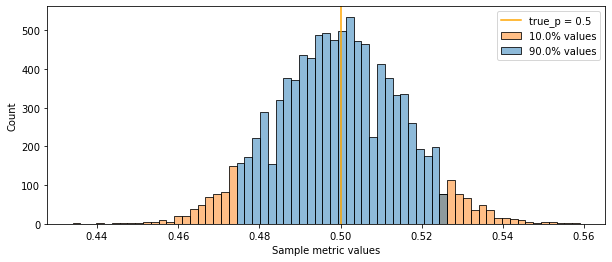

In [26]:
plt.figure(figsize=(10, 4))
plt.legend(fontsize=15)

sns.histplot(df_with_ci,
             x="samples_metrics",
             hue="ci",
             palette="tab10",
             )

plt.axvline(x=true_p, 
            c='orange')

plt.xlabel('Sample metric values')

plt.legend(labels=[f"true_p = {round(true_p,1)}", 
                   f'{(alpha) * 100}% values',
                   f'{(1-alpha) * 100}% values' 
                   ]
          )
plt.show()



In [27]:
alpha = 0.2

left_bound =  np.quantile(samples_metrics, alpha/2)
right_bound = np.quantile(samples_metrics, 1-alpha/2)
df_with_ci = df.assign(ci=lambda x: (x<= left_bound) | (x >= right_bound))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


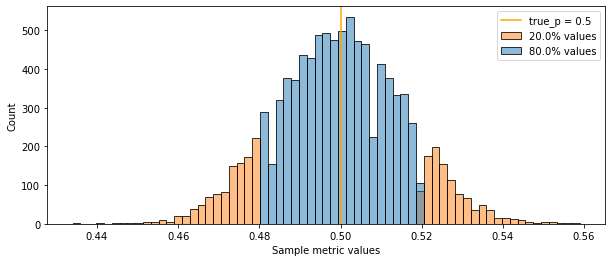

In [28]:
plt.figure(figsize=(10, 4))
plt.legend(fontsize=15)

sns.histplot(df_with_ci,
             x="samples_metrics",
             hue="ci",
             palette="tab10",
             )

plt.axvline(x=true_p, 
            c='orange')

plt.xlabel('Sample metric values')

plt.legend(labels=[f"true_p = {round(true_p,1)}", 
                   f'{(alpha) * 100}% values',
                   f'{(1-alpha) * 100}% values' 
                   ]
          )
plt.show()



At this point we can create **the rule:** 

>If our sample metric is in these *rare zones*, then it's unlikely that we have a fair coin

In statistical language we set hypotheses:

$H_0: p = 0.5$

$H_1: p <> 0.5$

Let's say, after the experiment we got 0.53 as sample metric

In [29]:
experiment_result = 0.53

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


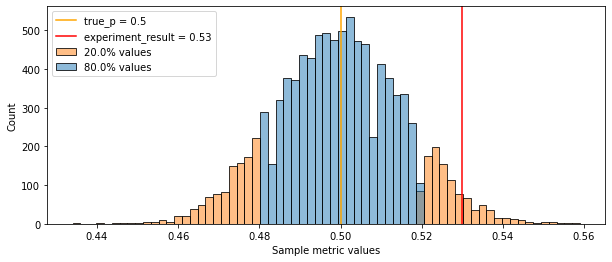

In [30]:
plt.figure(figsize=(10, 4))
plt.legend(fontsize=15)

sns.histplot(df_with_ci,
             x="samples_metrics",
             hue="ci",
             palette="tab10",
             )

plt.axvline(x=true_p, c='orange')
plt.axvline(experiment_result, color='r')

plt.xlabel('Sample metric values')


plt.legend(labels=[f"true_p = {round(true_p,1)}",
                   f"experiment_result = {round(experiment_result,2)}",
                   f'{(alpha) * 100}% values',
                   f'{(1-alpha) * 100}% values',
                   ]
          )
plt.show()

That's why we can **reject** null hypothesis

$H_0: p = 0.5$

With $\alpha$ level of significance. 

Where $\alpha$ is our threshold of how what we consider to be unlikely result


We also can calculate the probability to get such or more extreme result if $H_0$ is true

In [31]:
one_side_p_value = np.mean([x >= experiment_result for x in df_with_ci.samples_metrics]) 

In [32]:
two_sided_p_value = one_side_p_value * 2 
print(two_sided_p_value)

0.0598


In [33]:
left_bound =  np.quantile(samples_metrics, one_side_p_value)
right_bound = np.quantile(samples_metrics, 1-one_side_p_value)
df_with_p = df.assign(ci=lambda x: (x<= left_bound) | (x >= right_bound))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


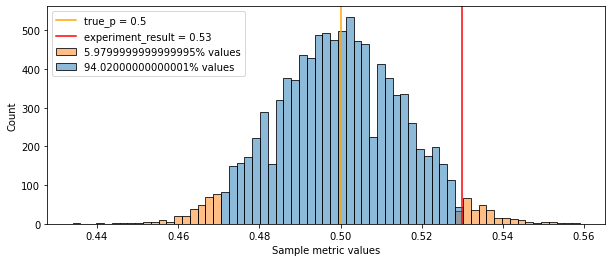

In [34]:
plt.figure(figsize=(10, 4))
plt.legend(fontsize=15)

sns.histplot(df_with_p,
             x="samples_metrics",
             hue="ci",
             palette="tab10",
             )

plt.axvline(x=true_p, c='orange')
plt.axvline(experiment_result, color='r')

plt.xlabel('Sample metric values')


plt.legend(labels=[f"true_p = {round(true_p,1)}",
                   f"experiment_result = {round(experiment_result,2)}",
                   f'{(two_sided_p_value) * 100}% values',
                   f'{(1-two_sided_p_value) * 100}% values',
                   ]
          )
plt.show()

These metric we call **p-value**

It is the probability to get this or more extreme result if null hypothesis is True

We can simply compare the **p-value** we got with our significance threshold $\alpha$ to say if we have to reject the $H_0$

In [35]:
print(f"""
p-value = {two_sided_p_value}
alpha = {alpha}

Reject H0 ? 

{"two_sided_p_value <= alpha then Reject" if two_sided_p_value <= alpha else "two_sided_p_value > alpha Not Reject"}

""")


p-value = 0.0598
alpha = 0.2

Reject H0 ? 

two_sided_p_value <= alpha then Reject




### Conclusion

Before an experiment we decide what deviations from H0 distribution we consider significant, it's our $\alpha$.

Then we calculate p-value on the result we got. If p-value is equal or less then $\alpha$ we reject H0. Because it seems unlikely to get such result if H0 is true with this level of significance

## Details about H0 distribution

At this point we can see that the whole magic comes from $H_0$ distribution as it defines our perpsective of significance in generall. $\alpha$ and p-value are just metrics to get precise calculations.  

So, in my opinion, to master statistical significance topic we have to focus on understanding $H_0$ distributions

### Key factors that defines H0 distribution

- The metric we estimate: 
    - sample mean
    - sample mean difference 
    - specific quantile
    - variance
    - ratio of two means

- The null hypothesis about this metric, we assume that: 
    - sample mean difference = 0
    - coin's head probability = 0.5
    - sample mean = 35$ 
    - ... 

- The variance of that metric:
    - Standard Error of the Mean
    - ...

- How much information we got:
    - Sample size
    - Parameters where we know the true value ( true metric variance ) 
    
    
For simplisity, let's focus on sample mean or sample mean difference. These metrics cover most of real life cases.
Why? Because mean is an approximation of an expected value which can be easily interpretaded in business terms. For example, the higher an expected value of user revenue the more revenue we will get. So, the average revenue per user (mean) is the best approximation of it.
Statistics like mode, meadian, etc. do not have such interpretations. 

### Binominal distribution aka proportions and conversions 

Sample example = [0, 1, 0, 1, 0, 0, 1]

- **The metric we estimate:**
    - sample mean, an approximation of probability to convert (p) 


- **The null hypothesis about this metric, we assume that:**
    - p = 0.5


- **The variance of that metric:**
    - $var=p(1-p)n$ ! feature of binominal distribution that its variance only depends on P. Finger explanation: if P = 1 than your sample will consist of 1 values only and it basically has zero variance. Same picture for P = 0, where you will get only 0 values. But the worst possible scenario is P = 0.5 It means that you have equal probability to get 0 or 1, so you will have the highest level of uncertainty of what you wiil get now 1 or 0. And the formula also shows that because 0.5 * 0.5 will give the highest possible varicance of all $p(1 - p) $ combinations. 


- **How much information we got:**
    - We will try: 100, 500, 1000
    - Metric variance comes from P, so we don't have to estimate it. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


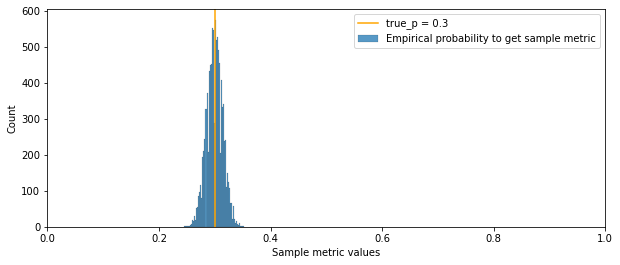

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


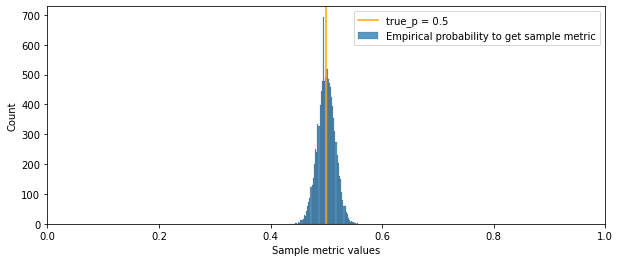

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


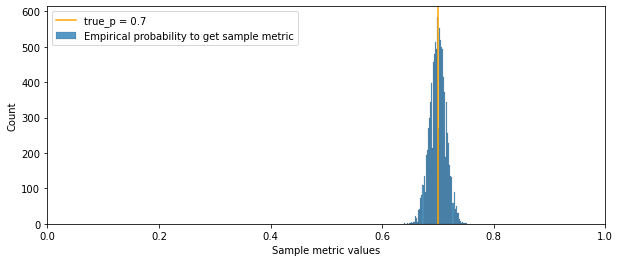

In [36]:
# MC to get H0 distribution 

sample_size = 1000
mc_iters = int(1e4) #10k iterations


# Iter through different H0 metric value
for true_p in (0.3, 0.5, 0.7):

    samples = sps.binom(p=true_p, n=sample_size).rvs(mc_iters)
    samples_metrics = samples / sample_size
    df = pd.DataFrame(samples_metrics, columns=["samples_metrics"])
    
    plt.figure(figsize=(10, 4))
    plt.legend(fontsize=15)
    plt.xlim(0, 1)

    sns.histplot(df,
                 x="samples_metrics",
                 palette="tab10",
                 label= 'Empirical probability to get sample metric')

    plt.axvline(x=true_p, 
                c='orange',
                label=f"true_p = {round(true_p,1)}")
    plt.xlabel('Sample metric values')

    plt.legend()
    plt.show()


**$H_0$ ditribution strongly depends on the base assumption of true metric**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


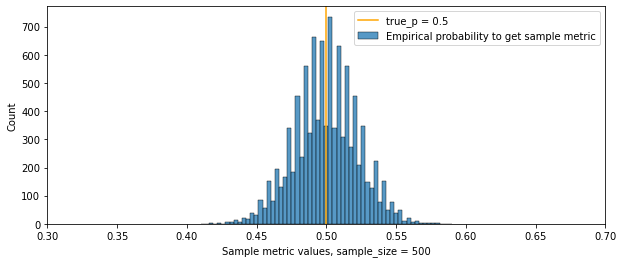

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


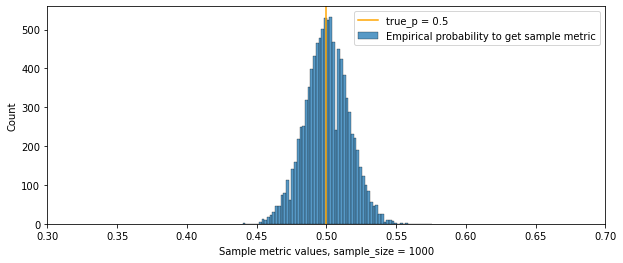

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


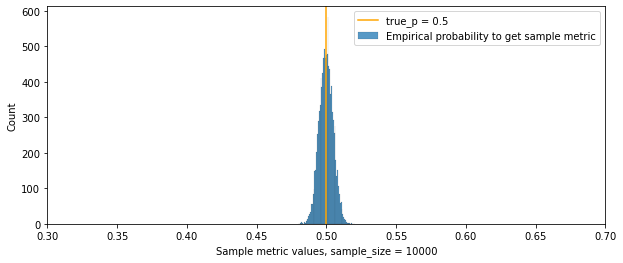

In [37]:
# MC to get H0 distribution 

true_p = 0.5
mc_iters = int(1e4) #10k iterations


# Iter through different sample size
for sample_size in (500, 1000, 10000):

    samples = sps.binom(p=true_p, n=sample_size).rvs(mc_iters)
    samples_metrics = samples / sample_size
    df = pd.DataFrame(samples_metrics, columns=["samples_metrics"])
    
    plt.figure(figsize=(10, 4))
    plt.legend(fontsize=15)
    plt.xlim(0.3, 0.7)

    sns.histplot(df,
                 x="samples_metrics",
                 palette="tab10",
                 label= 'Empirical probability to get sample metric')

    plt.axvline(x=true_p, 
                c='orange',
                label=f"true_p = {round(true_p,1)}")
    plt.xlabel(f'Sample metric values, sample_size = {int(sample_size)}')

    plt.legend()
    plt.show()

**$H_0$ ditribution strongly depends on the sample size. The bigger sample size, the less variance of possible values we have**

If our metric is a sample mean of values from binominal distributions, we need: 

- Assumption about true metric $H_0$ (p)
- Sample size



## Convertion difference

Sample example: 

test = [0, 1, 0, 1, 0, 0, 1]

control = [0, 1, 0, 1, 0, 0, 0]

- **The metric we estimate:**
    - sample mean difference (test - control), an approximation of uplift in probability to convert (p) 


- **The null hypothesis about this metric, we assume that:**
    - p_test - p_control = 0 (no changes)


- **The variance of that metric:**
    - var(test - control) = var(test) + var(control) by the rule of variance difference of two independent samples


- **How much information we got:**
    - We will try: 1000
    - Metric variance comes from P, so we don't have to estimate it. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


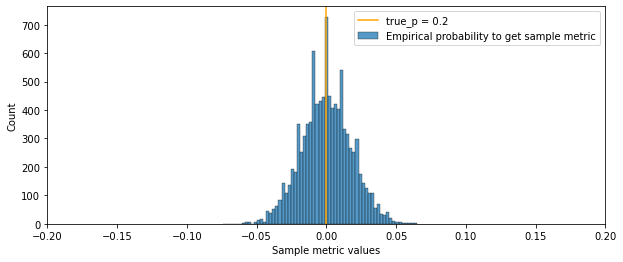

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


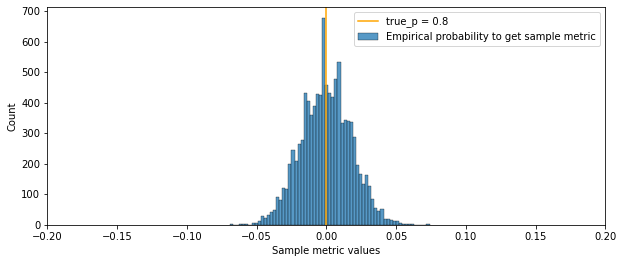

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


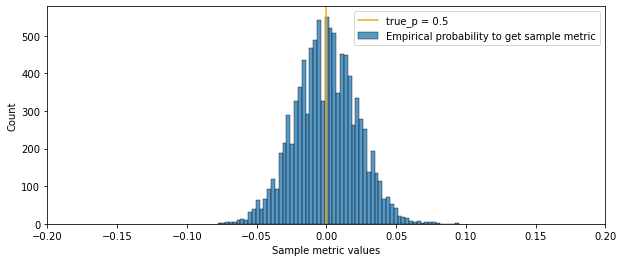

In [38]:
# MC to get H0 distribution 

sample_size = 1000
mc_iters = int(1e4) #10k iterations


# Iter through different H0 metric value
for true_p in (0.2, 0.8, 0.5):

    control_samples = sps.binom(p=true_p, n=sample_size).rvs(mc_iters)
    cotrol_samples_metrics = control_samples / sample_size
    
    test_samples = sps.binom(p=true_p, n=sample_size).rvs(mc_iters)
    test_samples_metrics = test_samples / sample_size
    
    difference_sample = test_samples_metrics - cotrol_samples_metrics
    
    df = pd.DataFrame(difference_sample, columns=["samples_metrics"])
    
    plt.figure(figsize=(10, 4))
    plt.legend(fontsize=15)
    plt.xlim(-0.2, +0.2)

    sns.histplot(df,
                 x="samples_metrics",
                 palette="tab10",
                 label= 'Empirical probability to get sample metric')

    plt.axvline(x=0, 
                c='orange',
                label=f"true_p = {round(true_p,1)}")
    plt.xlabel('Sample metric values')

    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


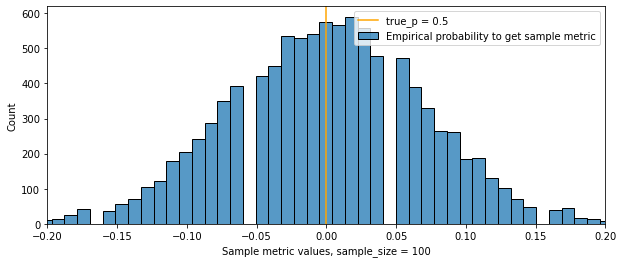

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


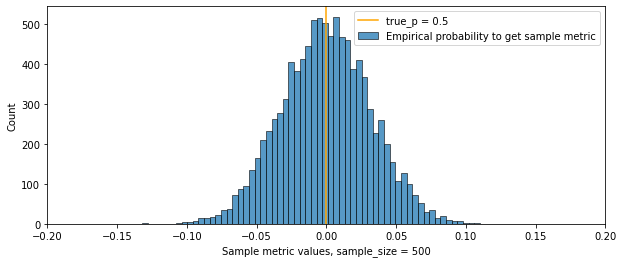

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


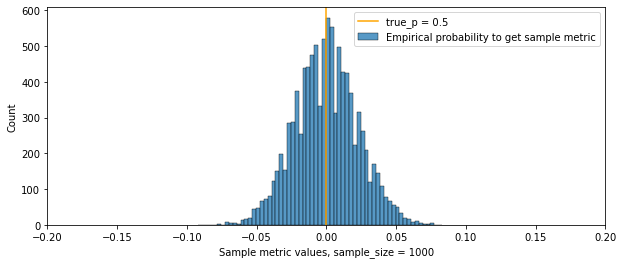

In [39]:
# MC to get H0 distribution 

mc_iters = int(1e4) #10k iterations
true_p = 0.5

for sample_size in (100, 500, 1000):

    control_samples = sps.binom(p=true_p, n=sample_size).rvs(mc_iters)
    cotrol_samples_metrics = control_samples / sample_size
    
    test_samples = sps.binom(p=true_p, n=sample_size).rvs(mc_iters)
    test_samples_metrics = test_samples / sample_size
    
    difference_sample = test_samples_metrics - cotrol_samples_metrics
    
    df = pd.DataFrame(difference_sample, columns=["samples_metrics"])
    
    plt.figure(figsize=(10, 4))
    plt.legend(fontsize=15)
    plt.xlim(-0.2, +0.2)

    sns.histplot(df,
                 x="samples_metrics",
                 palette="tab10",
                 label= 'Empirical probability to get sample metric')

    plt.axvline(x=0, 
                c='orange',
                label=f"true_p = {round(true_p,1)}")
    plt.xlabel(f'Sample metric values, sample_size = {int(sample_size)}')

    plt.legend()
    plt.show()

As in previous example, the distribution depends on:

- sample size
- true_p 

But why we need p if the null hypothesis states that difference equal 0 (no matter of p). It's because true p corresponds to a sample variance that leads to lower or higher noise of the estimations.

The main factor of precision is sample size, it affects distribution varicance much stronger then p